# Exploración de datos de viviendas

In [2]:
# Librerias básicas
import pandas as pd
import numpy as np

# Librerias de visualiación
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.neighbors import KNeighborsRegressor

## Exploramos los datos

In [3]:
# Verificamos cabeceras
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Interpretamos las variables

- **id**: Un identificador único para cada vivienda.   
- **date**: La fecha en la que se registró la información sobre la vivienda.  
- **price**: El precio de venta de la vivienda.  
- **bedrooms**: El número de dormitorios en la vivienda.  
- **bathrooms**: El número de baños en la vivienda.  
- **sqft_living**: Metros cuadrados de espacio habitable en la vivienda.  
- **sqft_lot**: Metros cuadrados del terreno en el que se encuentra la vivienda.  
- **floors**: Número de pisos en la vivienda.  
- **waterfront**: Variable binaria que indica si la vivienda tiene vista al agua (1 si tiene vista, 0 si no).  
- **view**: Nivel de vista de la vivienda (0-4), donde 0 puede indicar "sin vista".  
- **grade**: Clasificación de la calidad general de la vivienda (1-13), donde valores más altos indican una vivienda de mayor calidad.  
- **sqft_above**: Metros cuadrados de espacio habitable en la vivienda por encima del nivel del suelo.  
- **sqft_basement**: Metros cuadrados de espacio habitable en el sótano de la vivienda.  
- **yr_built**: Año en que se construyó la vivienda.  
- **yr_renovated**: Año en que se realizó la renovación de la vivienda.  
- **zipcode**: Código postal de la ubicación de la vivienda.  
- **lat**: Latitud de la ubicación de la vivienda.  
- **long**: Longitud de la ubicación de la vivienda.  
- **sqft_living15**: Metros cuadrados de espacio habitable promedio de las 15 viviendas más cercanas.  
- **sqft_lot15**: Metros cuadrados del terreno promedio de las 15 viviendas más cercanas.  

In [4]:
# Verificamos datos nulos
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Verificamos que tipo de datos contamos
'''
int64 : Enteros sin decimales
object : cadenas de texto (strings), listas, diccionarios y otros tipos de datos más complejos.
float64 : numeros con parte decimal
'''
data = pd.read_csv("kc_house_data.csv")
print(data.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

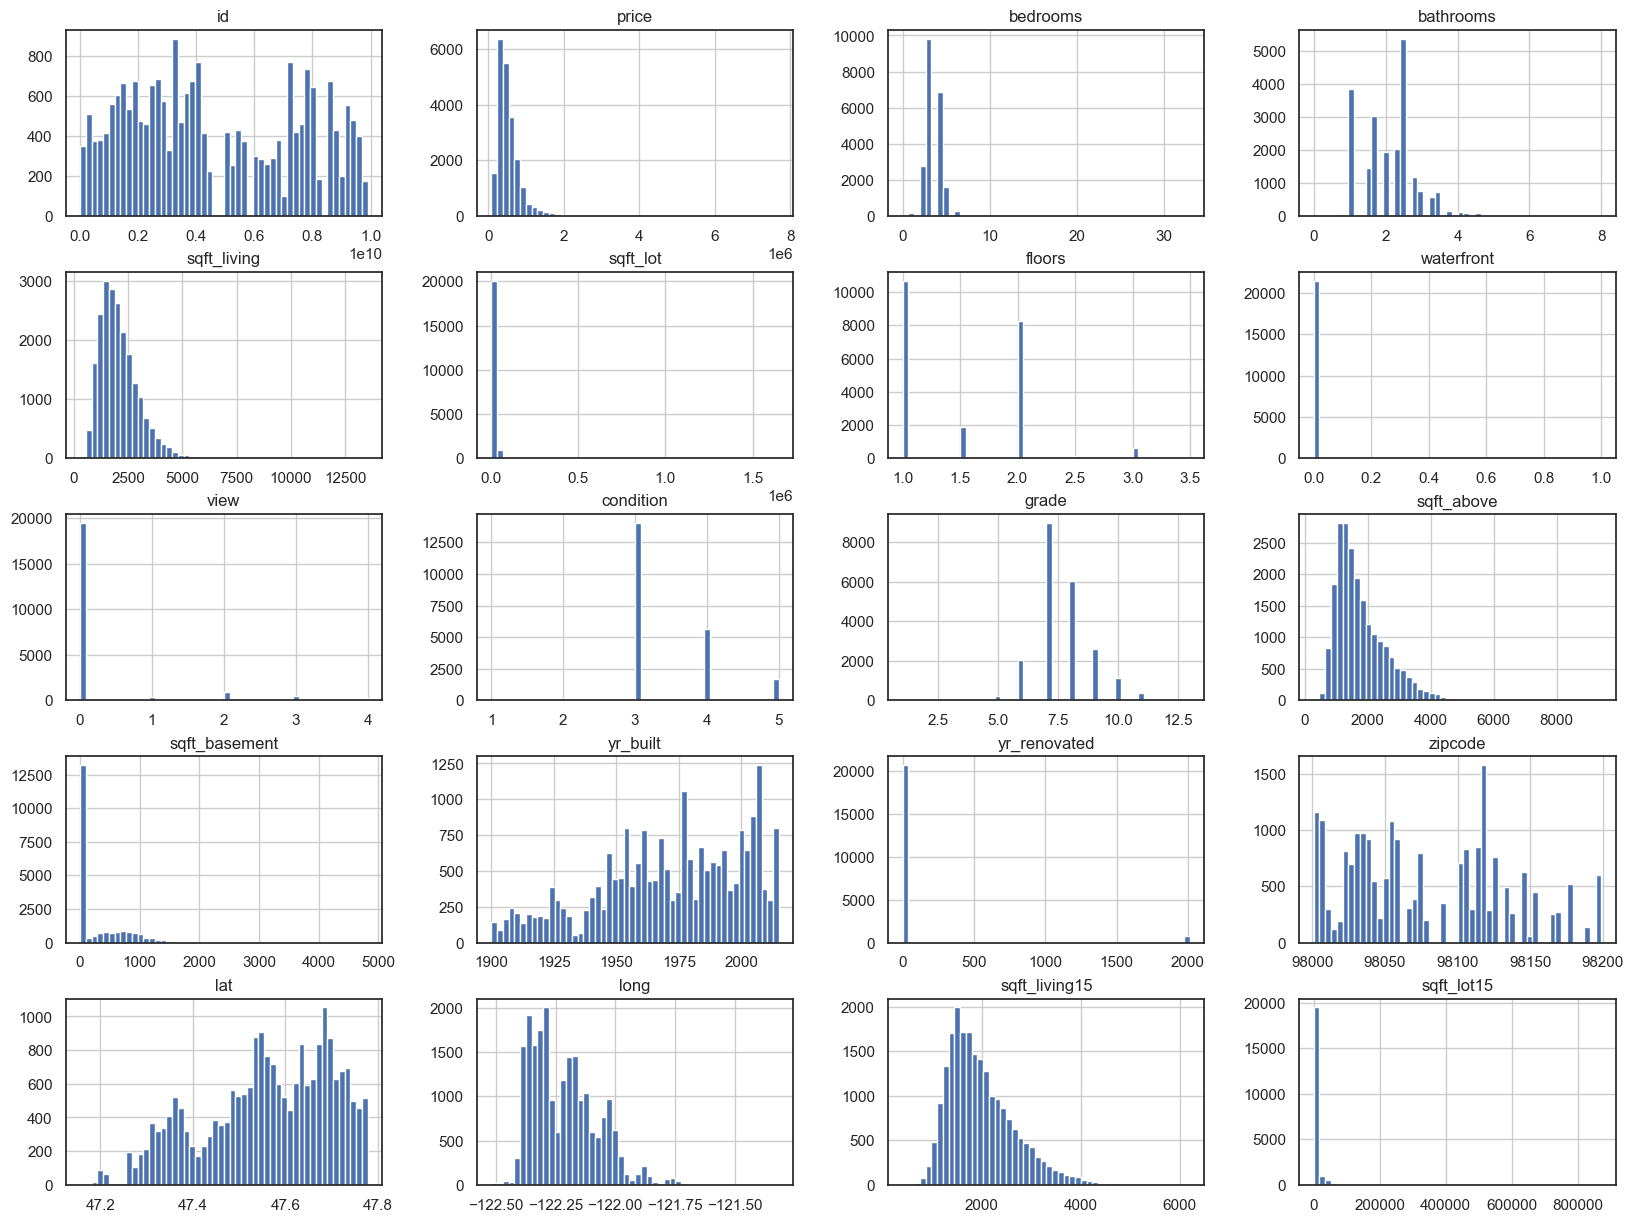

In [105]:
df.hist(bins=50, figsize=(20,15))

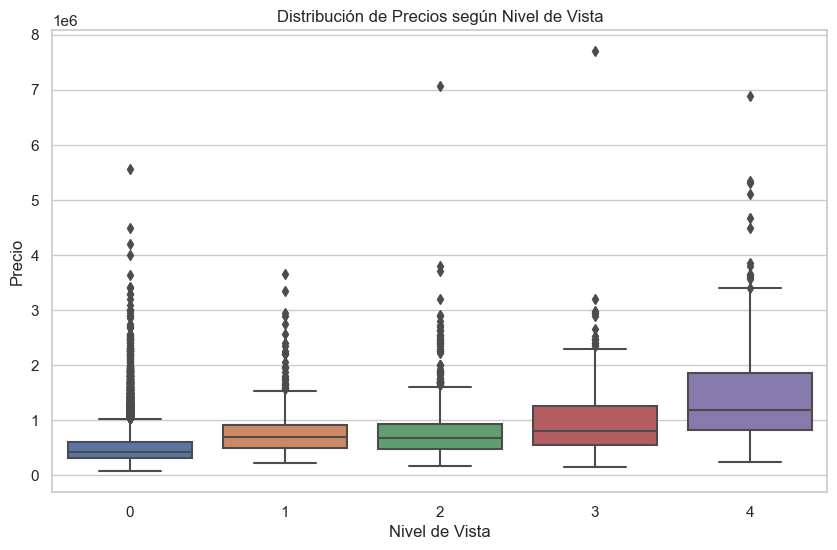

In [12]:
'''
Corroboramos si el nivel de vista esta relacionado al precio.
Definimos que en el nivel 1 y 2 no hay gran relevancia, 
sin embargo tanto en 0, 3 y 4 si que hay una variante significativa
'''
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='view', y='price')
plt.title('Distribución de Precios según Nivel de Vista')
plt.xlabel('Nivel de Vista')
plt.ylabel('Precio')
plt.show()


In [15]:
# Cargar tus datos desde un archivo CSV u otra fuente
data = pd.read_csv('kc_house_data.csv')

# Convertir la columna de fecha al formato de fecha de pandas
data['date'] = pd.to_datetime(data['date'])

# Crear una nueva columna con el formato dd-mm-aa
data['date_formatted'] = data['date'].dt.strftime('%d-%m-%y')

# Imprimir los primeros registros para verificar el resultado
print(data.head())

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257     

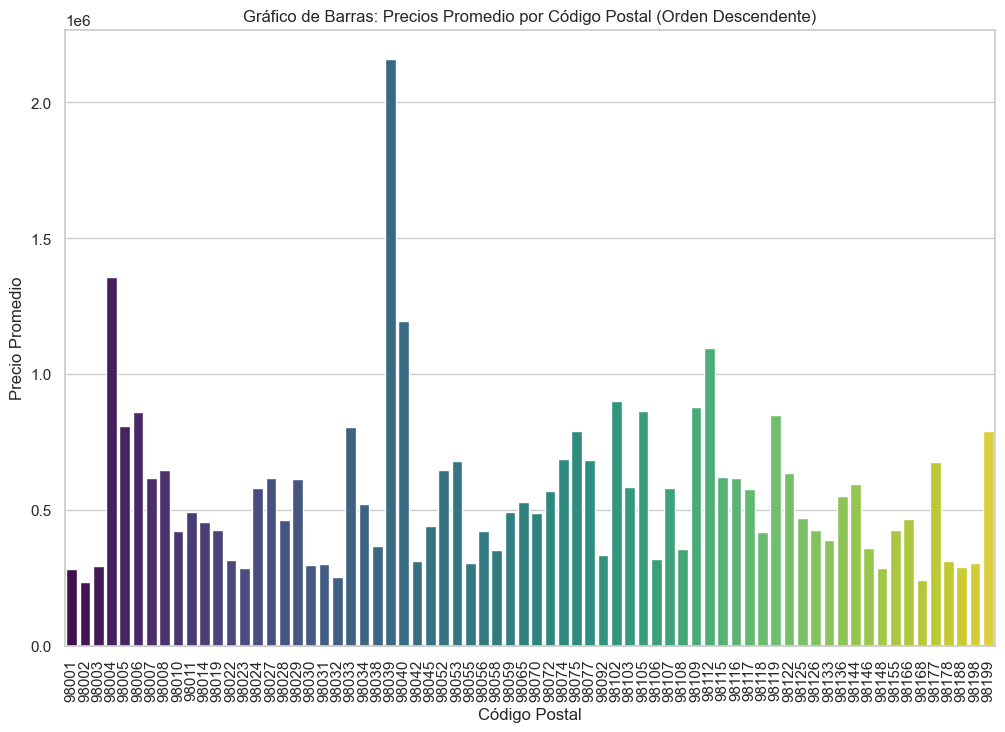

In [35]:
# Cargar tus datos en un DataFrame
data = pd.read_csv('kc_house_data.csv')

# Crear una tabla pivot para los precios promedio por código postal
pivot_table = data.pivot_table(index='zipcode', values='price', aggfunc='mean')

# Ordenar la tabla pivot por precio promedio de manera descendente
pivot_table = pivot_table.sort_values(by='price', ascending=False)

# Crear el gráfico de barras con los códigos postales en orden descendente
plt.figure(figsize=(12, 8))
sns.barplot(x=pivot_table.index, y=pivot_table['price'], palette='viridis')
plt.title('Gráfico de Barras: Precios Promedio por Código Postal (Orden Descendente)')
plt.xlabel('Código Postal')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=90)
plt.show()


In [43]:
import pandas as pd

# Cargar tus datos en un DataFrame
data = pd.read_csv('kc_house_data.csv')

# Seleccionar las columnas deseadas
selected_columns = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'yr_built', 'yr_renovated', 'zipcode']

# Convertir las columnas 'bathrooms' y 'floors' a números enteros
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)

# Crear un nuevo DataFrame con las columnas seleccionadas
selected_data = data.loc[:, selected_columns]

# Imprimir el nuevo DataFrame
print(selected_data.head())


   sqft_living  bedrooms  bathrooms  floors  waterfront  view  grade  \
0         1180         3          1       1           0     0      7   
1         2570         3          2       2           0     0      7   
2          770         2          1       1           0     0      6   
3         1960         4          3       1           0     0      7   
4         1680         3          2       1           0     0      8   

   yr_built  yr_renovated  zipcode  
0      1955             0    98178  
1      1951          1991    98125  
2      1933             0    98028  
3      1965             0    98136  
4      1987             0    98074  


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar tus datos en un DataFrame
data = pd.read_csv('kc_house_data.csv')

# Seleccionar las columnas deseadas
selected_columns = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'price']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
selected_data = data[selected_columns]

# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = selected_data.drop('price', axis=1)
y = selected_data['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Imprimir el MSE
print("Error cuadrático medio:", mse)


Error cuadrático medio: 52894345397.463104


In [53]:
import pandas as pd

# Cargar tus datos en un DataFrame
data = pd.read_csv('kc_house_data.csv')

# Eliminar las columnas "id" y "fecha"
columns_to_drop = ['id', 'date']
data = data.drop(columns=columns_to_drop, axis=1)

# Imprimir el DataFrame resultante
print(data)


          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1  

In [54]:
print(data.dtypes)

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [60]:
# Cargar tus datos en un DataFrame
data = pd.read_csv('kc_house_data.csv')

# Convertir las columnas "bathrooms" y "floors" a int64
data['bathrooms'] = data['bathrooms'].astype('int64')
data['floors'] = data['floors'].astype('int64')
data['price'] = data['price'].astype('int64')

# Eliminar las columnas "id" y "fecha"
columns_to_drop = ['id', 'date']
data = data.drop(columns=columns_to_drop, axis=1)

# Imprimir el DataFrame resultante

print(data.head())

    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900         3          1         1180      5650       1           0   
1  538000         3          2         2570      7242       2           0   
2  180000         2          1          770     10000       1           0   
3  604000         4          3         1960      5000       1           0   
4  510000         3          2         1680      8080       1           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15 

In [61]:
print(data.dtypes)

price              int64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


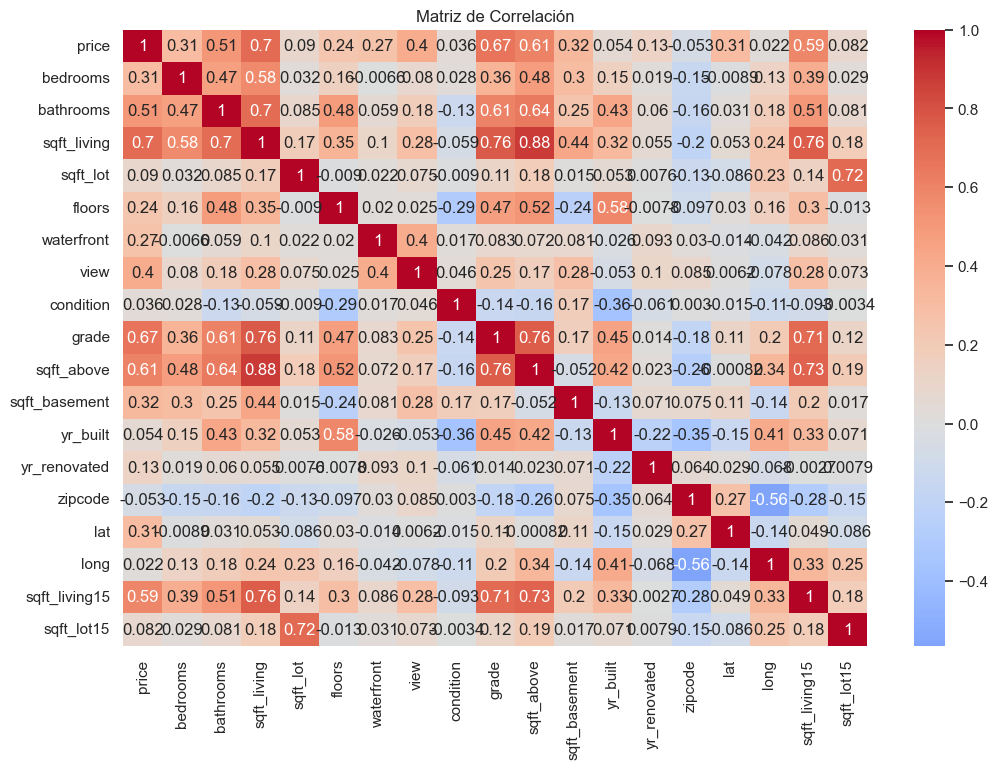

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar tus datos en un DataFrame
data = pd.read_csv('kc_house_data.csv')

# Convertir las columnas "bathrooms" y "floors" a int64
data['bathrooms'] = data['bathrooms'].astype('int64')
data['floors'] = data['floors'].astype('int64')

# Eliminar las columnas "id" y "fecha"
columns_to_drop = ['id', 'date']
data = data.drop(columns=columns_to_drop, axis=1)

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar tus datos en un DataFrame
data = pd.read_csv('kc_house_data.csv')

# Seleccionar las columnas relevantes (sin 'id' ni 'date')
selected_columns = ['price','sqft_living', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront', 'view','condition', 'grade','sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Filtrar el DataFrame para las columnas seleccionadas
data_selected = data[selected_columns]

# Calcular el VIF para cada característica
vif_data = pd.DataFrame()
vif_data["Feature"] = data_selected.columns
vif_data["VIF"] = [variance_inflation_factor(data_selected.values, i) for i in range(len(data_selected.columns))]

# Imprimir los resultados
print(vif_data)


c:\Users\Administrator\Documents\Machine-lerner\ML_Predicter\env_ml\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          Feature           VIF
0           price  1.053622e+01
1     sqft_living           inf
2        bedrooms  2.365334e+01
3       bathrooms  2.882280e+01
4        sqft_lot  2.378510e+00
5          floors  1.689394e+01
6      waterfront  1.276220e+00
7            view  1.595318e+00
8       condition  3.493203e+01
9           grade  1.608968e+02
10     sqft_above           inf
11  sqft_basement           inf
12       yr_built  1.021820e+04
13   yr_renovated  1.196750e+00
14        zipcode  1.694878e+06
15            lat  1.592914e+05
16           long  1.377074e+06
17  sqft_living15  2.716137e+01
18     sqft_lot15  2.601933e+00


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Cargar tus datos en un DataFrame
data = pd.read_csv('kc_house_data.csv')

# Seleccionar las columnas para las características (X) y el valor objetivo (y)
feature_columns = ['sqft_living', 'sqft_living15', 'sqft_above', 'grade', 'bedrooms', 'long', 'lat', 'zipcode']
target_column = 'price'

# Dividir los datos en características y valor objetivo
X = data[feature_columns]
y = data[target_column]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("Error cuadrático medio (RMSE):", rmse)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio (MSE): 56720942218.36315
Error cuadrático medio (RMSE): 238161.58846120242
Coeficiente de determinación (R²): 0.6248037057321929


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Cargar tus datos en un DataFrame
data = pd.read_csv('kc_house_data.csv')

# Seleccionar las columnas para las características (X) y el valor objetivo (y)
feature_columns = ['sqft_living', 'sqft_living15', 'sqft_above', 'grade', 'bedrooms', 'long', 'lat', 'zipcode']
target_column = 'price'

# Dividir los datos en características y valor objetivo
X = data[feature_columns]
y = data[target_column]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("Error cuadrático medio (RMSE):", rmse)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio (MSE): 25466077939.30762
Error cuadrático medio (RMSE): 159580.94478761437
Coeficiente de determinación (R²): 0.8315476136560007
